# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
#Loading dataset
df=pd.read_csv("Categorical_Data.csv")

In [20]:
print('data set has got {} rows and {} columns'.format(df.shape[0],df.shape[1]))

data set has got 300000 rows and 25 columns


In [22]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [26]:
X=df.drop(['target'],axis=1)
y=df['target']

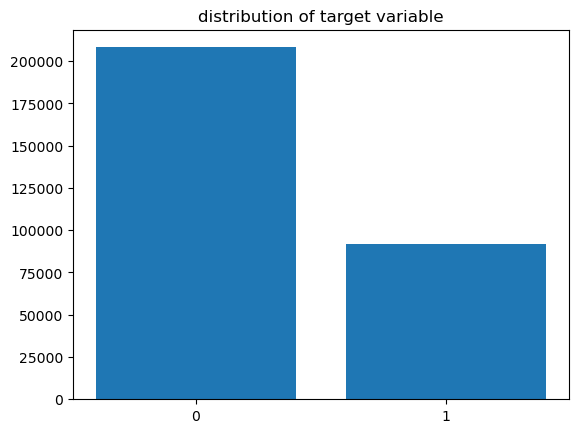

In [28]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

Before getting into encoding,I will just breif you with types data variables present in this data:

Binary data : A binary variable a variable that has only 2 values..ie 0/ time.

Categorical data : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.


Ordinal data : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.


Nominal data : Nominal value is a variable that has no numerical importance,such as occupation,person name etc..


Timeseries data : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.

# Method 1: Label encoding 

In this method we change every categorical data to a number.That is each type will be subtuted by a number.for example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc.. For implementing this we will first import Labelencoder from sklearn module.

Now we will do these three steps to label encode our data:

Initialize the labelencoder class

Call the fit() method to fit the data

Transform data to labelencoded data

In [44]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder
df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Here you can see the label encoded output data.We will check the shape of data now and verify that there is no change in the number of columns.

In [55]:
print('data set has got {} rows and {} columns'.format(df.shape[0],df.shape[1]))

data set has got 300000 rows and 25 columns


# Method 2 : On hot encoding 

Our second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. 

To do that,we need to :

Import OneHotEncoder from sklean.preprocessindata

Initialize the OneHotEncoder


Fit and then transform our data

In [65]:
# Apply One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 300000 rows and 316461 columns


# Method 3 : Frequency Encoding

In [67]:
# Apply Frequency Encoding
df_freq_encoded = df.copy()
for col in categorical_cols:
    freq_map = df[col].value_counts().to_dict()
    df_freq_encoded[col] = df[col].map(freq_map)